# Time Series Analysis - I

In Finance, most of the data driven decisions are taken looking at the past trends of various factors influcing the economy. The way how each of these factors affect the subject (Bond/Portfolio/Price) and its correlation with other events or factors are generally be derived by calculating the exposure of the Bond or Portfolio to the factor or by finding the covariance between different factor values for calculating interaction. Both of these values are derived by looking at the historical changes and sequence of events. Hence time series analysis is crucial component in Finance and Risk Management.

A time series is basically a series of data points which are indexed in time order. This order is sometimes minute, hour, day, month or maybe year. The goal of quantitative researchers is to identify trends, seasonal variations and correlation in this financial time series data using statistical methods and ultimately generate trading signals by carefully evaluating the Risks involved. Time Series Analysis provides us with a robust statistical framework for assessing the behaviour of time series, such as asset prices, in order to help us trade off of this behaviour.

**Objective: ** This notebook covers some essential basic concepts related to statistical time series analysis and forecasting techniques

### Stationarity

A time series is considered to be stationary when (with classic examples found everywhere):

1) The mean of the series is not a function of time.
<img src="images/ts1.png">

2) The variance of the series is not a function of time. This is called homoscedasticity.
<img src="images/ts2.png">

3) The covariance of the ith term and (i+m)th term is not a function of time.
<img src="images/ts3.png">


Stationarity of a time series is important because a lot of statistical techniques assume time series to be stationary as in such cases we can assume that the future statistical properties of the series are going to be same as that of current statsistical properties. If it is not, we try to make/transform them into stationary time series. 


### Autocorrelation 

A time series model decomposes the series into three components: trend, seasonal, and random.

The random component is called the residual or error - the difference between our predicted value(s) and the observed value(s). Autocorrelation is when these residuals (errors) are correlated with each other. That is, if the error of the ith is dependent on errors of any of the terms $0 .. i-1$ before. 

The Autocorrelation Function (ACF) for a series gives correlation between the series x(t) and lagged values of the series for lags of 1,2, ..
The ACF can be used to identify the possible structure of time series data. The ACF of the residuals for a model is useful. 
Following is an ACF plot of the residuals for a time series. The lag is shown on the horizontal axis and autocorrelation is on the the vertical. The red lines indicate the bounds of statistical significance. This is a good ACF for the residuals as nothing is significant, meaning that the residuals are not dependent on past, hence they are random in nature, which is what we would like them to be.

<img src="images/ACF11.gif">

**Why should we care about Autocorrelation? **

Serial correlation is critical for the validity of our model predictions - The residuals (errors) of a stationary TS are serially uncorrelated by definition. It is critical we account for autocorrelation in our model otherwise the standard errors of our estimates for the parameters will be biased and underestimated, making any tests that we try to form using the model invalid. In layman's terms, ignoring autocorrelation means we're likely to draw incorrect conclusions about the impact of the independent variables in our model.



### Partial Autocorrealtion (PACF)

This refers to Partial Autocorrelation function.
Suppose you have 3 points in a time series x3, x2, x1. Using ACF you would generally find the correlation between x1 and x2. The value of correlation thus obtained is technically not true value of correlation, because the value of x2 is likely to be inspired by the value of x3. So PACF is that portion of the correlation between x1 and x2, which is not explained by the correlation between x3 in x2.

For an AR model, the theoretical PACF shuts off past the order of the model. This means that the Partial Autocorrelations are equal to 0 beyond that point. The number of non-zero partial autocorrelations gives the order of the AR model. 


### White Noise

By definition a time series that is a white noise process has serially uncorrelated errors and the expected mean of those errors is equal to zero. This means that the errors(residuals) are completely drawn at random from some probability distribution, i.e it is independent and identically distributed (i.i.d.). 

If our time series model results in white noise residuals, it means we have successfully captured the underlying process and explained any form of correlation, only leaving errors(residuals) which are completely random. Our predicted values differ from the observed values only by a random error component that cannot be forecasted or modeled.

Most of time series analysis is literally trying to fit a model to the time series such that the residual series is indistinguishable from white noise.

**Following cells contain some code to plot the contents, ACF and PACF of the series along with QQ and Probability plots to check how similar are the residuals to the normal distribution. **

In [ ]:
# Importing the needed packages
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

In [2]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    '''
    Prepares a (3,2) dimensional plot for the visualization of time series values, autocorrelation and partial 
    autocorrelation plots and QQ and probability plots for comparision with normal distribution.
    
    Args:
    y: time series values
    lags: How many lagging values are to be considered.
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

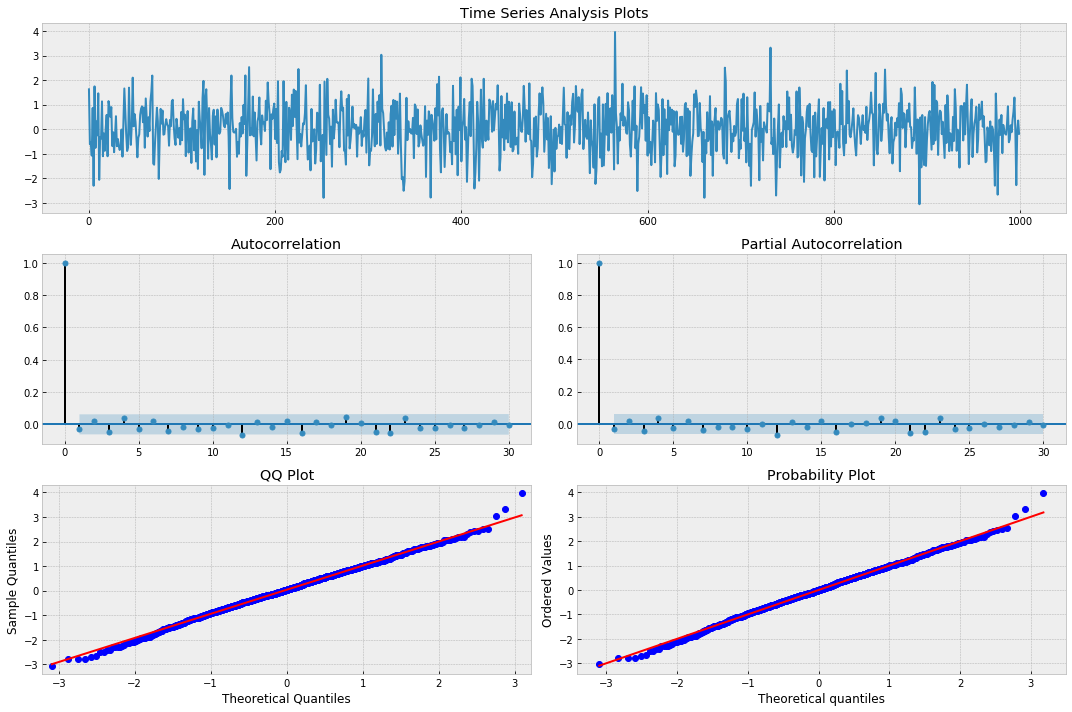

In [3]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

**Description of the plots: **

1) First plot are the values of the time series plotted against time.

2) Second row are the plots of Autocorrelation (ACF) and Partial Autocorrelation (PACF).

3) Third row has QQ Plot and the Probability Plot.

    